<a href="https://colab.research.google.com/github/kajalpanda1/ML-Assignments/blob/master/KMeans_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
winedf=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Wine_Quality.csv')

In [ ]:
winedf.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
winedf.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
winedf.shape

(6497, 13)

In [ ]:
winedf.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

In [ ]:
winedf['fixed acidity'].fillna(value=winedf['fixed acidity'].mean(),inplace=True)
winedf['pH'].fillna(value=winedf['pH'].mean(),inplace=True)
winedf['volatile acidity'].fillna(value=winedf['volatile acidity'].mean(),inplace=True)
winedf['sulphates'].fillna(value=winedf['sulphates'].mean(),inplace=True)
winedf['citric acid'].fillna(value=winedf['citric acid'].mean(),inplace=True)
winedf['chlorides'].fillna(value=winedf['chlorides'].mean(),inplace=True)
winedf['residual sugar'].fillna(value=winedf['residual sugar'].mean(),inplace=True)

In [ ]:
winedf1=winedf.iloc[:,1:].values

In [ ]:
from sklearn.preprocessing import Normalizer
sc=Normalizer()
winedf1=sc.fit_transform(winedf1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Components = pca.fit_transform(winedf1)

In [ ]:
principalDf = pd.DataFrame(data=Components
             ,columns=['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, winedf['quality']], axis = 1)

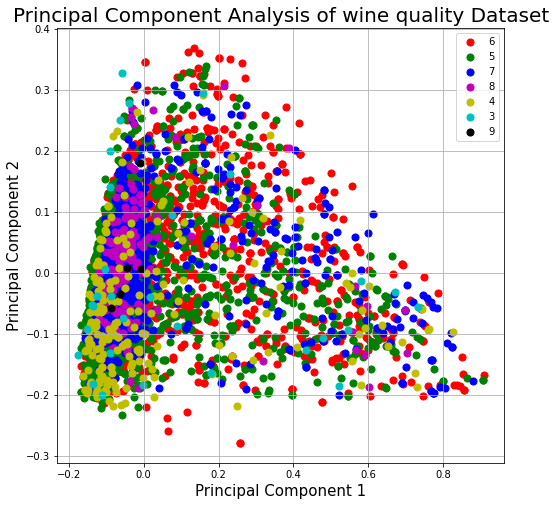

In [ ]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title("Principal Component Analysis of wine quality Dataset", fontsize = 20)

classes = [6, 5, 7, 8, 4, 3, 9]
colors = ['r','g','b','m','y','c','k']
for target, color in zip(classes,colors):
    indicesToKeep = finalDf['quality'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c=color
               , s = 50)
ax.legend(classes)
ax.grid()

In [ ]:
finalDf.shape

(6497, 3)

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10,random_state=10)
y_kmeans=kmeans.fit_predict(winedf1)

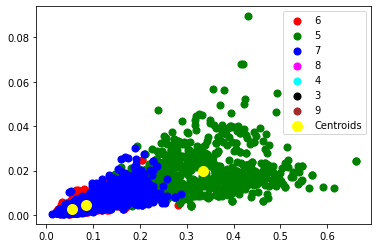

In [ ]:
plt.scatter(winedf1[y_kmeans==0,0],winedf1[y_kmeans==0,1], s=50, c='red', label='6')
plt.scatter(winedf1[y_kmeans==1,0],winedf1[y_kmeans==1,1], s=50, c='green', label='5')
plt.scatter(winedf1[y_kmeans==2,0],winedf1[y_kmeans==2,1], s=50, c='blue', label='7')
plt.scatter(winedf1[y_kmeans==3,0],winedf1[y_kmeans==3,1], s=50, c='magenta', label='8')
plt.scatter(winedf1[y_kmeans==4,0],winedf1[y_kmeans==4,1], s=50, c='cyan', label='4')
plt.scatter(winedf1[y_kmeans==5,0],winedf1[y_kmeans==5,1], s=50, c='black', label='3')
plt.scatter(winedf1[y_kmeans==6,0],winedf1[y_kmeans==6,1], s=50, c='brown', label='9')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

In [ ]:
kmeans.inertia_

91.4511223692664

In [ ]:
kmeans.cluster_centers_

array([[-2.31739795e-04,  8.01231415e-03,  6.00000000e+00],
       [ 1.36228509e-02,  1.29158525e-02,  7.15896633e+00],
       [-7.02146247e-03, -1.64498601e-02,  4.88422819e+00]])